## Grid Search for Hyper Parameters

In [8]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (
    KFold,
    GridSearchCV,
    train_test_split
)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X.shape

(569, 30)

In [5]:
# target percentage
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [6]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

## Grid Search

In [9]:
# set up the GBM
gbm = GradientBoostingClassifier(random_state=0)

# set up the param_grid 
param_grid = dict(n_estimators=[10, 20, 50, 100], 
                  min_samples_split=[0.1, 0.3, 0.5],
                  max_depth=[1,2,3,4,None],
                 )

# set up kfold
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# estimate generalization error using cross_validate
clf = GridSearchCV(gbm,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   refit=True, # refit the data with the best params
                   cv=kf # k-fold
                  )

search = clf.fit(X_train, y_train)

# best hyper parameters
search.best_params_

{'max_depth': 3, 'min_samples_split': 0.5, 'n_estimators': 100}

In [12]:
print('Number of hyperparam combinations: ', 
      len(param_grid['n_estimators'])
      *len(param_grid['min_samples_split'])
      *len(param_grid['max_depth']))

Number of hyperparam combinations:  60


In [11]:
# clf is basically a dictionary that returns the scores and other cross validation results
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016414,0.006490,0.038332,7.166313e-02,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.977214,0.973586,0.948571,0.994177,0.982468,0.975203,0.015025,58
1,0.021592,0.000499,0.002009,1.563706e-05,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.976562,0.975818,0.948889,0.993789,0.987013,0.976414,0.015312,53
2,0.050599,0.000490,0.002193,3.843074e-04,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.981771,0.988839,0.973968,0.997671,0.993506,0.987151,0.008446,30
3,0.102200,0.002301,0.002608,4.963679e-04,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.979818,0.991815,0.978413,1.000000,0.995455,0.989100,0.008567,18
4,0.012005,0.000008,0.002195,4.019425e-04,1,0.3,10,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.977214,0.973586,0.948571,0.994177,0.982468,0.975203,0.015025,58
5,0.021000,0.000002,0.002001,6.325960e-07,1,0.3,20,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.976562,0.975818,0.948889,0.993789,0.987013,0.976414,0.015312,53
6,0.050408,0.000498,0.002591,5.010603e-04,1,0.3,50,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.981771,0.988839,0.973968,0.997671,0.993506,0.987151,0.008446,30
7,0.098800,0.000399,0.002000,2.501482e-05,1,0.3,100,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.979818,0.991815,0.978413,1.000000,0.995455,0.989100,0.008567,18
8,0.011787,0.000417,0.002204,4.185278e-04,1,0.5,10,"{'max_depth': 1, 'min_samples_split': 0.5, 'n_...",0.977214,0.973586,0.948571,0.994177,0.982468,0.975203,0.015025,58
9,0.020998,0.000002,0.002802,3.997112e-04,1,0.5,20,"{'max_depth': 1, 'min_samples_split': 0.5, 'n_...",0.976562,0.975818,0.948889,0.993789,0.987013,0.976414,0.015312,53


In [13]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
0,3,0.5,100,0.992395,0.006153
1,3,0.1,100,0.992063,0.004285
2,4,0.5,100,0.991726,0.006181
3,4,0.3,50,0.991251,0.004796
4,3,0.3,100,0.991070,0.004484


In [15]:
# worst performing models
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].tail()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
55,4,0.5,10,0.975522,0.018618
56,None,0.5,10,0.975318,0.017083
57,1,0.5,10,0.975203,0.015025
58,1,0.3,10,0.975203,0.015025
59,1,0.1,10,0.975203,0.015025


Text(0.5, 0, 'Hyperparameter combinations')

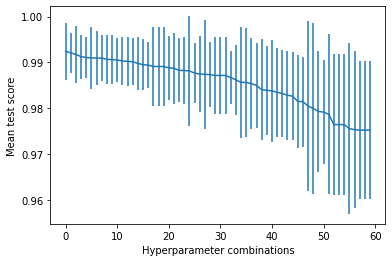

In [18]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [17]:
# get the predictions

preds_train = search.predict_proba(X_train)[:,1]
preds_test = search.predict_proba(X_test)[:,1]

print('Train data score : {}'.format(roc_auc_score(y_train, preds_train)))
print('Test data score : {}'.format(roc_auc_score(y_test, preds_test)))

Train data score : 1.0
Test data score : 0.9986772486772487


- Here we are getting a training score of 100%, so kind of over fitted with the training data

In [23]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [19]:
# lets check the performance based on single hyper parameter

def summarize_by_param(param):
    tmp = pd.concat([
        results.groupby(param)['mean_test_score'].mean(), 
        results.groupby(param)['mean_test_score'].std()
        ], axis = 1)
    tmp.columns = ['mean_test_score','std_test_score']
    
    return tmp    

In [22]:
temp = summarize_by_param('param_n_estimators')
temp.head()

,mean_test_score,std_test_score
param_n_estimators,,
10,0.979546,0.003513
20,0.984779,0.004880
50,0.988068,0.002691
100,0.989447,0.002949


Text(0, 0.5, 'roc_auc')

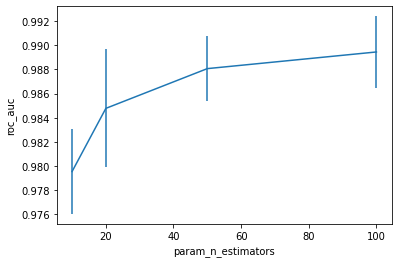

In [25]:
temp['mean_test_score'].plot(yerr=(temp['std_test_score'],temp['std_test_score']))
plt.ylabel('roc_auc')

The optimal hyperparameter seems to be somewhere between 60 and 100.

In [26]:
# similary check for other params
temp = summarize_by_param('param_max_depth')
temp.head()

,mean_test_score,std_test_score
param_max_depth,,
1,0.981967,0.006488
2,0.986953,0.003601
3,0.988069,0.004238
4,0.986986,0.005052


Text(0, 0.5, 'roc_auc')

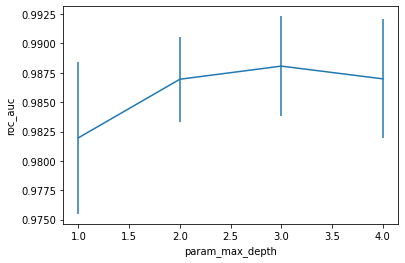

In [27]:
temp['mean_test_score'].plot(yerr=(temp['std_test_score'],temp['std_test_score']))
plt.ylabel('roc_auc')

- Optimal hyper param value lies somewhere between 2 and 3

In [28]:
# similarly for the last param
temp = summarize_by_param('param_min_samples_split')
temp.head()

,mean_test_score,std_test_score
param_min_samples_split,,
0.1,0.985154,0.004976
0.3,0.986135,0.004674
0.5,0.985091,0.006079


Text(0, 0.5, 'roc_auc')

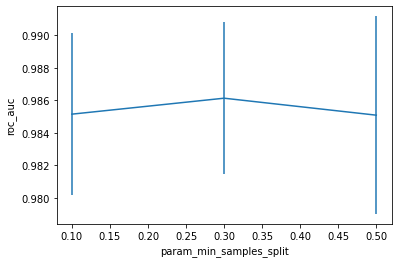

In [29]:
temp['mean_test_score'].plot(yerr=(temp['std_test_score'],temp['std_test_score']))
plt.ylabel('roc_auc')

- This one doesnt seem to have much impact on the performance

In [30]:
# lets deep dive for other hyper param space 
# knowing the n_estimators might lie between 60-100 and
# max depth between 2 and 3

# determine the hyperparameter space
param_grid = dict(
    n_estimators=[60, 80, 100, 120, 140],
    max_depth=[2,3],
    loss = ['deviance', 'exponential'], # adding additional hyper parameter
    )

# set up the search
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3],
                         'n_estimators': [60, 80, 100, 120, 140]},
             scoring='roc_auc')

In [31]:
search.best_params_

{'loss': 'exponential', 'max_depth': 2, 'n_estimators': 140}

In [32]:
# clf is basically a dictionary that returns the scores and other cross validation results
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102622,0.003895,0.002186,0.000407,deviance,2,60,"{'loss': 'deviance', 'max_depth': 2, 'n_estima...",0.998667,0.979000,0.991333,0.995172,0.991156,0.991066,0.006638,10
1,0.134615,0.001009,0.002369,0.000492,deviance,2,80,"{'loss': 'deviance', 'max_depth': 2, 'n_estima...",0.999333,0.978333,0.990000,0.994483,0.991837,0.990797,0.006979,12
2,0.168798,0.001956,0.002201,0.000401,deviance,2,100,"{'loss': 'deviance', 'max_depth': 2, 'n_estima...",1.000000,0.979667,0.990667,0.995172,0.995238,0.992149,0.006904,7
3,0.204596,0.003493,0.002596,0.000511,deviance,2,120,"{'loss': 'deviance', 'max_depth': 2, 'n_estima...",1.000000,0.980333,0.990667,0.995862,0.995918,0.992556,0.006791,5
4,0.232407,0.001190,0.001993,0.000011,deviance,2,140,"{'loss': 'deviance', 'max_depth': 2, 'n_estima...",1.000000,0.981000,0.990667,0.995862,0.995238,0.992553,0.006491,6
5,0.141799,0.000759,0.002601,0.000490,deviance,3,60,"{'loss': 'deviance', 'max_depth': 3, 'n_estima...",0.998000,0.974667,0.992667,0.992414,0.988435,0.989237,0.007894,19
6,0.192397,0.006523,0.002394,0.000480,deviance,3,80,"{'loss': 'deviance', 'max_depth': 3, 'n_estima...",0.998000,0.974000,0.992667,0.994483,0.989116,0.989653,0.008335,18
7,0.236821,0.003111,0.002179,0.000401,deviance,3,100,"{'loss': 'deviance', 'max_depth': 3, 'n_estima...",0.998000,0.974333,0.992667,0.995172,0.990476,0.990130,0.008288,16
8,0.285611,0.004166,0.002181,0.000382,deviance,3,120,"{'loss': 'deviance', 'max_depth': 3, 'n_estima...",0.998667,0.973667,0.992667,0.995172,0.991156,0.990266,0.008680,15
9,0.332606,0.002508,0.002393,0.000496,deviance,3,140,"{'loss': 'deviance', 'max_depth': 3, 'n_estima...",0.999333,0.974333,0.992667,0.995172,0.992517,0.990805,0.008597,11


In [33]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)


KeyError: "['param_min_samples_split'] not in index"

In [34]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_loss', 'param_max_depth', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [35]:
results[[
    'param_max_depth', 'param_loss', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

,param_max_depth,param_loss,param_n_estimators,mean_test_score,std_test_score
0,2,exponential,140,0.993164,0.006315
1,2,exponential,120,0.993095,0.006174
2,2,exponential,100,0.992828,0.006021
3,2,exponential,80,0.992765,0.006340
4,2,deviance,120,0.992556,0.006791


In [36]:
# get the predictions

preds_train = search.predict_proba(X_train)[:,1]
preds_test = search.predict_proba(X_test)[:,1]

print('Train data score : {}'.format(roc_auc_score(y_train, preds_train)))
print('Test data score : {}'.format(roc_auc_score(y_test, preds_test)))

Train data score : 1.0
Test data score : 0.9976484420928865


- It is still overfitting, we can reduce the no of estimators or play with other hyper params to get this fixed
- As we can see in the above table, n_estimators = 140 and 120 doesnt have much difference on the performance but the no of tress are more, so we can reduce it to 120 instead of 140, maybe

In [37]:
gbm = GradientBoostingClassifier(n_estimators=120, max_depth=2, loss='exponential', random_state=0)

gbm.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', max_depth=2, n_estimators=120,
                           random_state=0)

In [38]:
# get the predictions

preds_train = gbm.predict_proba(X_train)[:,1]
preds_test = gbm.predict_proba(X_test)[:,1]

print('Train data score : {}'.format(roc_auc_score(y_train, preds_train)))
print('Test data score : {}'.format(roc_auc_score(y_test, preds_test)))

Train data score : 0.9999999999999999
Test data score : 0.9973544973544973


- This still looks better than the earlier one.